In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np


In [2]:
np.random.seed(156)
img_size = (224,224)
batch_size = 16

In [3]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "../../Dataset_3",
    validation_split= 0.2,
    subset='training',
    seed=123,
    image_size= img_size,
    batch_size=batch_size
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "../../Dataset_3",
    validation_split= 0.2,
    subset='validation',
    seed=123,
    image_size= img_size,
    batch_size=batch_size
)

Found 25077 files belonging to 2 classes.
Using 20062 files for training.
Found 25077 files belonging to 2 classes.
Using 5015 files for validation.


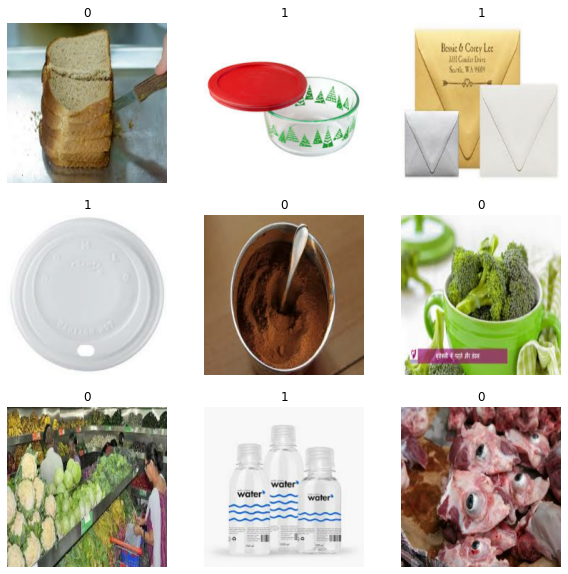

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

plt.show()

In [5]:
def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")


def plot_hist_loss(hist):
    plt.plot(hist.history["loss"])
    plt.plot(hist.history["val_loss"])
    plt.title("model loss")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")

In [6]:
data_aug = keras.Sequential(
    [
     layers.experimental.preprocessing.RandomFlip("horizontal"),
     layers.experimental.preprocessing.RandomRotation(0.125),
    ],
    name = "aug_layer"
)

In [7]:
mainmodel = tf.keras.applications.EfficientNetB0(
            input_shape= (224,224,3),
            weights='imagenet',
            include_top= False,
            )

In [8]:
model = tf.keras.Sequential(
    [
        keras.Input(shape=(224,224,3)),
        data_aug,
        mainmodel,
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout (0.5),
        keras.layers.Dense(1,activation='relu'),

    ]
)
mainmodel.trainable = False

In [9]:
for layer in model.layers[-20:]:
            if not isinstance(layer,layers.BatchNormalization):
                layer.trainable = True

In [10]:
#hyperparameter : l_rate,batch_size,epoch, optimizer

In [11]:
optimizer = keras.optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer= optimizer, loss='binary_crossentropy',metrics=['accuracy'])

stopper = keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max',patience= 5)

In [14]:
model_run = model.fit(train_ds, validation_data=test_ds, epochs=30)

Epoch 1/30
1254/1254 [==============================] - 252s 201ms/step - loss: 1.6779 - accuracy: 0.8810 - val_loss: 1.1930 - val_accuracy: 0.9135
Epoch 2/30
1254/1254 [==============================] - 242s 193ms/step - loss: 1.5215 - accuracy: 0.8937 - val_loss: 1.1546 - val_accuracy: 0.9174
Epoch 3/30
1254/1254 [==============================] - 242s 193ms/step - loss: 2.1032 - accuracy: 0.8546 - val_loss: 1.5945 - val_accuracy: 0.8891
Epoch 4/30
1254/1254 [==============================] - 242s 193ms/step - loss: 1.7709 - accuracy: 0.8765 - val_loss: 1.5084 - val_accuracy: 0.8955
Epoch 5/30
1254/1254 [==============================] - 241s 192ms/step - loss: 1.6695 - accuracy: 0.8833 - val_loss: 1.2296 - val_accuracy: 0.9127
Epoch 6/30
1254/1254 [==============================] - 240s 192ms/step - loss: 1.6376 - accuracy: 0.8863 - val_loss: 1.2755 - val_accuracy: 0.9107
Epoch 7/30
1254/1254 [==============================] - 240s 191ms/step - loss: 1.7227 - accuracy: 0.8813 - val_

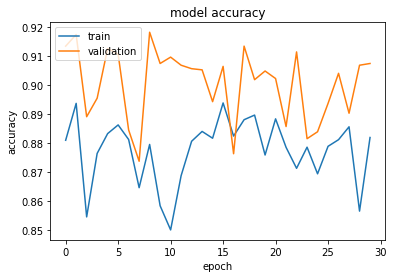

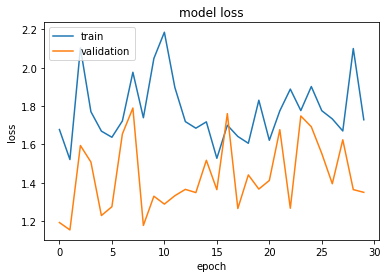

314/314 [==============================] - 16s 51ms/step - loss: 1.3505 - accuracy: 0.9075


In [15]:
plot_hist(model_run)
plt.savefig('Accuracy Curve_BSize_16')
plt.show()

plot_hist_loss(model_run)
plt.savefig('Loss Curve_BSize_16')
plt.show()


performance = model.evaluate(test_ds)